In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

From Dec23 to Feb24 there are 13 weeks.  
six days each week means 78 days.  
5 hours each day means 390 hours.

In [2]:
df = {
    'date':  ['01/12', '02/12', '03/12', '04/12', '05/12', '06/12', '07/12', '08/12', '09/12', '10/12', '11/12', '12/12', '13/12', '14/12'],
    'hours': [2.0    , 2.5    , 2.0    , 3.5    , 3.5    , 2.0    , 5.0    , 3.0    , 1.5    , 2.0    , 1.5    , 2.5    , 3.5    , 2      ],
    'day':   ['fri'  , 'sat'  , 'sun'  , 'mon'  , 'tue'  , 'wed'  , 'thr'  , 'fri'  , 'sat'  , 'sun'  , 'mon'  , 'tue'  , 'wed'  , 'thr'  ],
    'week':  [1      , 1      , 1      , 1      , 1      , 1      , 1      , 2      , 2      , 2      , 2      , 2      , 2      , 2      ]
}

In [3]:
df = pd.DataFrame(df)
df


,date,hours,day,week
0,01/12,2.0,fri,1
1,02/12,2.5,sat,1
2,03/12,2.0,sun,1
3,04/12,3.5,mon,1
4,05/12,3.5,tue,1
5,06/12,2.0,wed,1
6,07/12,5.0,thr,1
7,08/12,3.0,fri,2
8,09/12,1.5,sat,2
9,10/12,2.0,sun,2


In [4]:
print(df['hours'].mean())
df['hours'].sum()

2.607142857142857


36.5

In [5]:
df.groupby('week').agg({'hours': ['sum','mean']})

hours          
       sum      mean
week                
1     20.5  2.928571
2     16.0  2.285714

In [6]:
df.groupby('day', sort = False).agg({'hours': 'mean'})

,hours
day,
fri,2.50
sat,2.00
sun,2.00
mon,2.50
tue,3.00
wed,2.75
thr,3.50


<Axes: xlabel='date', ylabel='hours'>

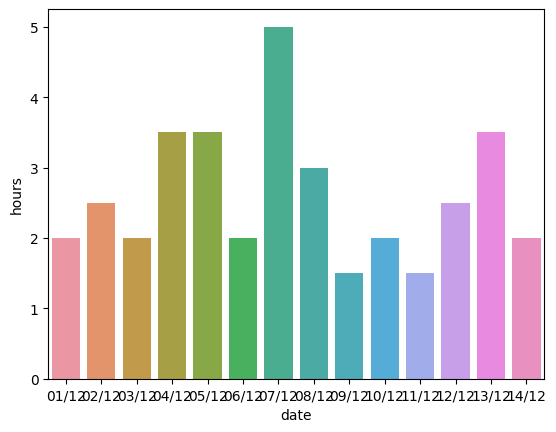

In [7]:
sns.barplot(x = df['date'], y = df['hours'])

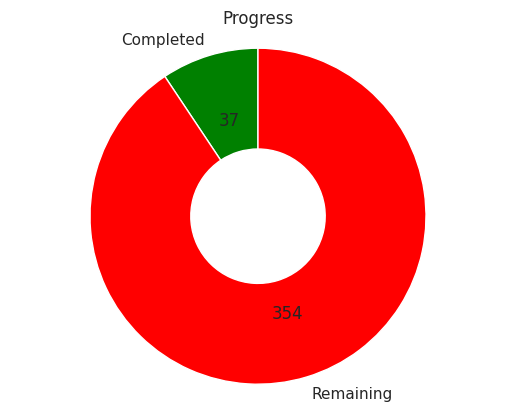

In [8]:
completed = df['hours'].sum()
remaining = 390 - completed

# Seaborn style settings (optional but can enhance aesthetics)
sns.set(style="whitegrid")

# Data for the donut chart
sizes = [completed, remaining]
labels = ['Completed', 'Remaining']
colors = ['green', 'red']  # Specify colors for completed and remaining portions

# Create a donut chart using Matplotlib's plt.pie()
plt.pie(sizes, labels=labels, autopct=lambda p: '{:.0f}'.format(p * sum(sizes) / 100), startangle=90, wedgeprops=dict(width=0.6), colors=colors)

# Draw a circle in the center to create the hole
centre_circle = plt.Circle((0, 0), 0.3, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title to represent the task
plt.title('Progress')

# Show the plot
plt.show()